# 需要保存的部分代码

In [ ]:
### 加载检查点，恢复之前的训练进度 ###
# 需要设置 config 中的 ckpt_iter = 'max'

# load checkpoint
if ckpt_iter == 'max':
    ckpt_iter = find_max_epoch(output_directory)
if ckpt_iter >= 0:
    try:
        # load checkpoint file
        model_path = os.path.join(output_directory, '{}.pkl'.format(ckpt_iter))
        checkpoint = torch.load(model_path, map_location='cpu')

        # feed model dict and optimizer state
        net.load_state_dict(checkpoint['model_state_dict'])
        if 'optimizer_state_dict' in checkpoint:
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

        print('Successfully loaded model at iteration {}'.format(ckpt_iter))
    except:
        ckpt_iter = -1
        print('No valid checkpoint model found, start training from initialization try.')
else:
    ckpt_iter = -1
    print('No valid checkpoint model found, start training from initialization.')

# 检查数据
(8000, 100, 14)

(n, length, fearutes)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
imputation = np.load('/mnt/sdb/hanyuji-data/SSSD_results/mujoco_output/imputation2.npy').transpose(0,2,1)
mask = np.load('/mnt/sdb/hanyuji-data/SSSD_results/mujoco_output/mask0.npy').transpose(0,2,1)
original = np.load('/mnt/sdb/hanyuji-data/SSSD_results/mujoco_output/original0.npy').transpose(0,2,1)

In [5]:
print(imputation.shape)
print(mask.shape)
print(original.shape)


(500, 100, 14)
(500, 100, 14)
(500, 100, 14)


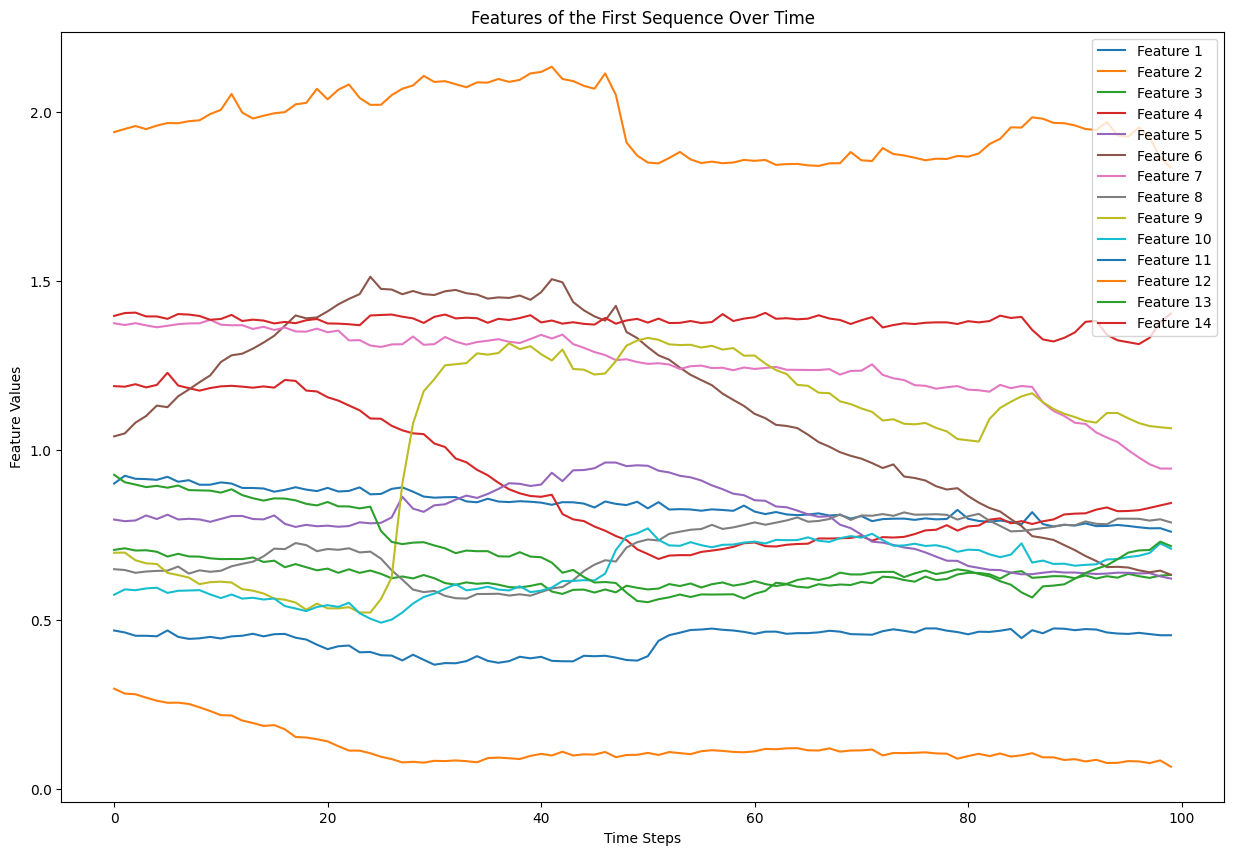

In [12]:
sequence = imputation[31]

# 绘制所有特征
plt.figure(figsize=(15, 10))
for i in range(sequence.shape[1]):
    plt.plot(sequence[:, i], label=f'Feature {i+1}')
    # feature_values = sequence[:, i]
    # plt.scatter(range(len(feature_values)), feature_values, label=f'Feature {i+1}')

plt.title('Features of the First Sequence Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Feature Values')
plt.legend()
plt.show()